___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)

In [1]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
# Checking the shape of one image
X_train[9].shape

(28, 28)

In [11]:
X_train[9]
# piksel değerlerini görüyoruz : 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  

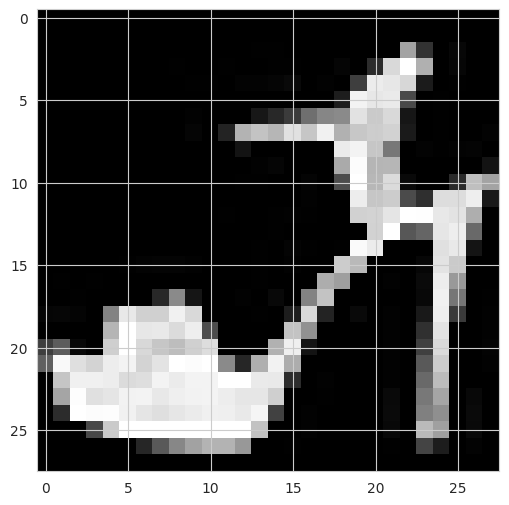

In [12]:
plt.imshow(X_train[9],cmap='gray')

# bize gelen resimler burada  array şeklinde olduğundan bunu plt.imshow ile görselleştirebiliyoruz ama gelen resimler array 
# şeklinde olmasaydı eğer önce arraye çevirip ardından görselleştirebilecektik.
# cmap=None olursa yalancı bir renklendirme yapar .Ama ben gray-scale olduğunu bildiğimden bunu belirtiyorum.

<Axes: >

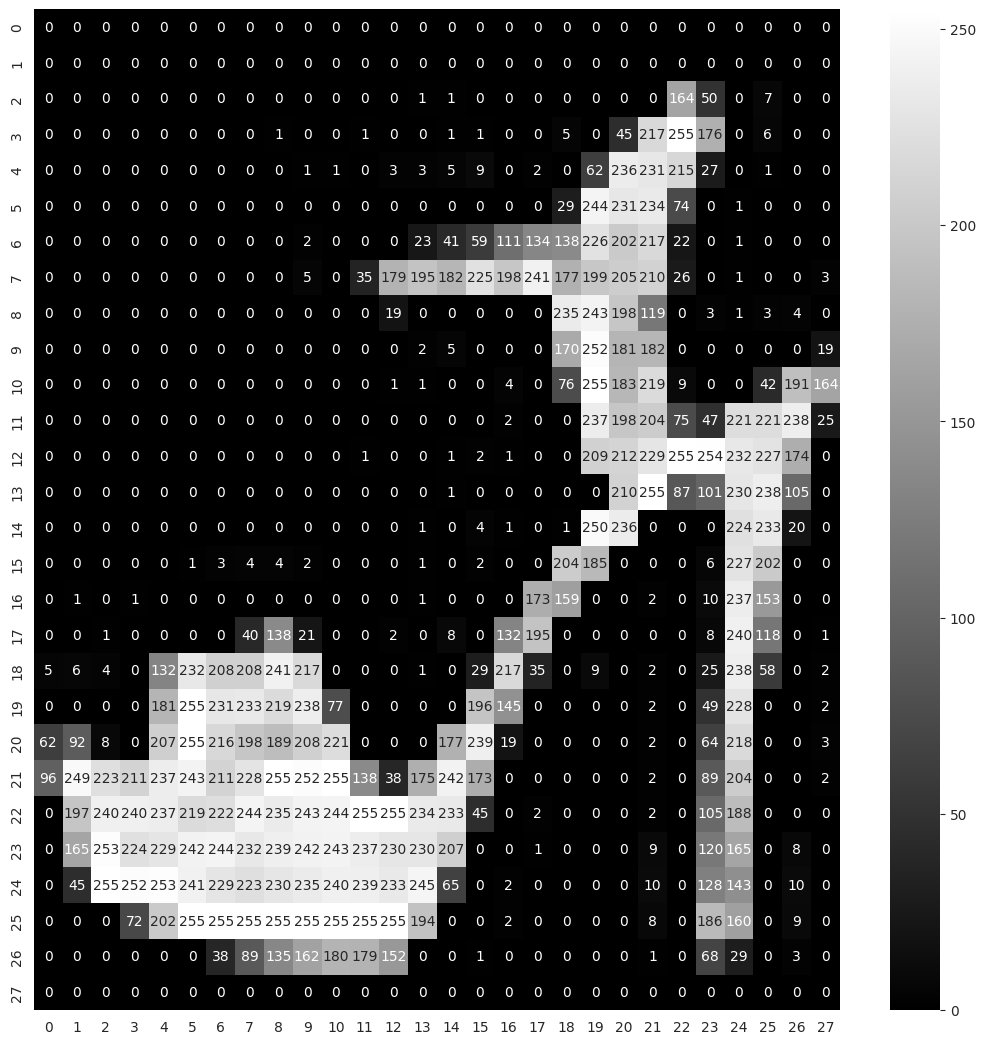

In [13]:
plt.figure(figsize=(13, 13))
sns.heatmap(X_train[9], annot=True, cmap="gray", fmt=".3g")
# bilgisayar bunu nasıl görüyor ona bakıyoruz.(255'e yaklaştıkça beyaz 0'a yaklaştıkça siyah)

In [14]:
X_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
y_train[9]

5

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

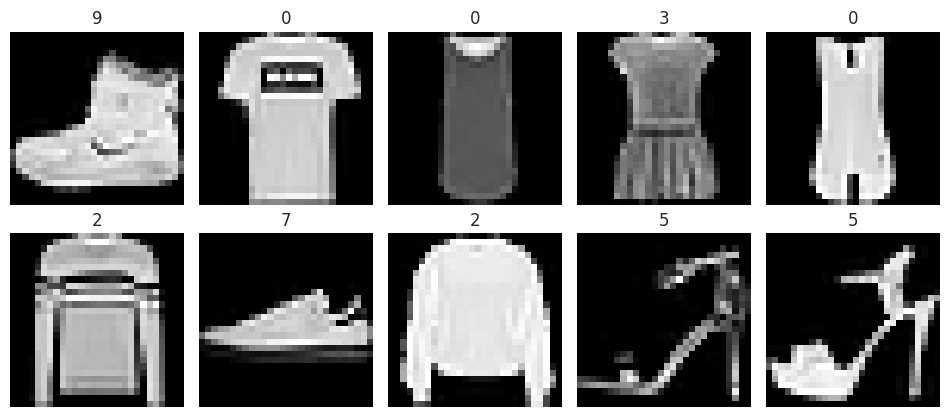

In [17]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.09, 'hspace':0.1}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title( y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

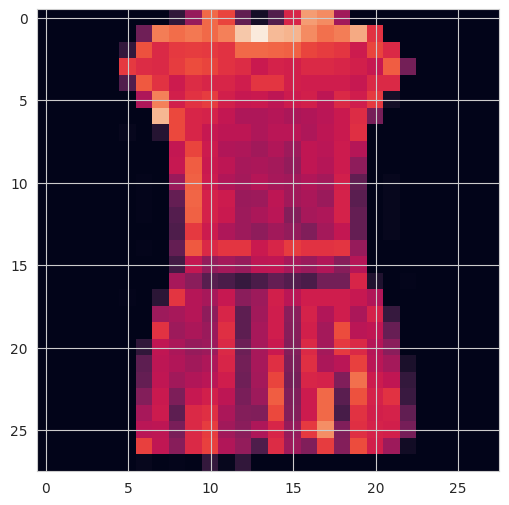

In [18]:
plt.imshow(X_train[3])

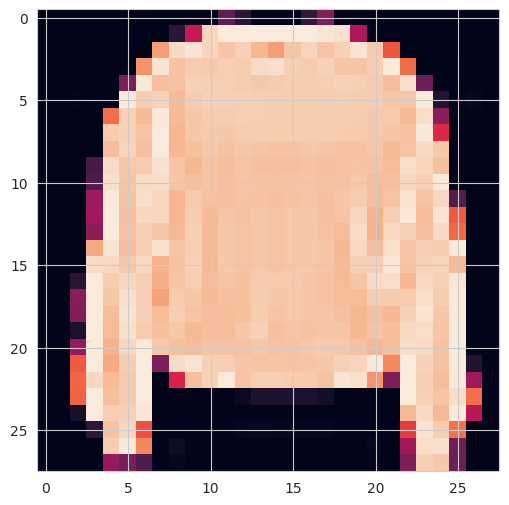

In [20]:
plt.imshow(X_train[7])

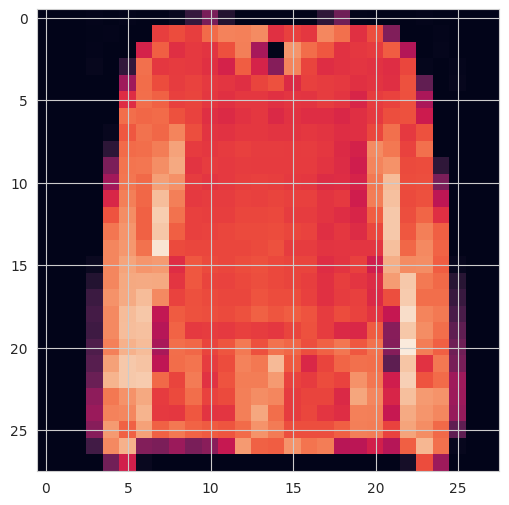

In [23]:
plt.imshow(X_train[18])

In [24]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [25]:
X_train[9].min()

0

In [26]:
X_train[9].max()

255

In [27]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255

# MinMaxScaler yapmış oluyoruz aslında burada.
# minimum değerimiz 0 olduğundan Scaler kullanmadan bu şekilde scaling yapabiliriz. elimizdeki data resimde olsa scaling var!

In [28]:
X_train[9].min()

0.0

In [29]:
X_train[9].max()

1.0

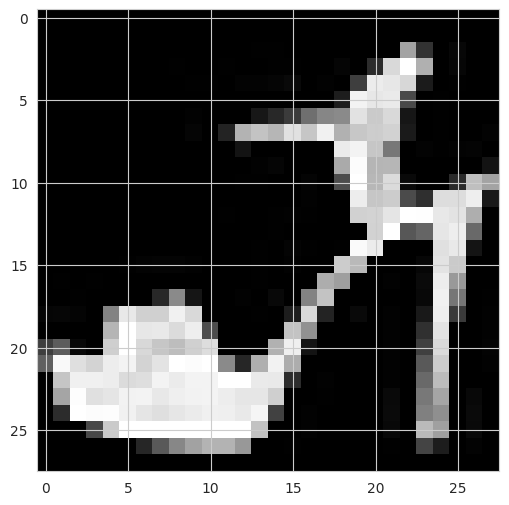

In [30]:
plt.imshow(X_train[9],cmap='gray')

# scale yaptık ama plt.imshow bunu anlıyor ve bize istediğimiz gibi yine resmi getiriyor.

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [31]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [32]:
X_train.reshape(60000, 28, 28, 1).shape
# biz modelleme aşamasına geçtiğimizde bizden model kanal sayısını isteyecek ondan dolayı burada kanal sayısını da belirteceğiz.
# model kanal sayısını istiyor çünkü ona göre filtreleri vs ayarlıyor.

(60000, 28, 28, 1)

In [33]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [34]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [35]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [36]:
y_train.shape

(60000,)

In [37]:
from tensorflow.keras.utils import to_categorical

In [38]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [39]:
y_train[9]

# burada 4'ü temsil eden nöron 1 olsun diğerleri 0 olsun bu hale çevirdik to_categorical ile Y_train'i:

5

In [40]:
Y_train[9]

## kuracağımız mimariye uygun hale getirdik targetımızı.(output layer'a uygun şu anda.)
# fit aşamasında bu Y_train'i kullanacağımıza dikkat edelim.

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [43]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

                # 32 filtre olsun bunlar 3*3'lük filtreler olsun -------> filter_size = kernel_size
                # input_shape=(28, 28, 1) yine burada belirtebiliyoruz.

model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

model.add(Flatten()) # flatten ile vektörel hale getirip ann yapısına geçiyoruz.

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
model.summary()

## max_pooling2d katmanında eğitilecek bir parametre yoktur burada sadece downsampling oluyor 
## Flatten'da da yine eğitilecek bir parametre yoktur burada sadece cnn mimarisine bir hazılık yapıyoruz.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=4, restore_best_weights = True)

# cnn'de overfittinge gitme ihtimalimiz çok yüksektir bunun nedeni ; featurelar aslında çok fazla oluyor (feature learning)
# ama onlara karşılılık gelen data sayım o kadar fazla olmuyor genelde. bundan dolayı patience'ı cnn modellerinde düşük seçeriz.

In [47]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test,Y_test),callbacks=[early_stop]) 

Epoch 1/20
1875/1875 [==============================] - 18s 4ms/step - loss: 0.3940 - accuracy: 0.8602 - val_loss: 0.3536 - val_accuracy: 0.8689
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2657 - accuracy: 0.9033 - val_loss: 0.2745 - val_accuracy: 0.9020
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2219 - accuracy: 0.9180 - val_loss: 0.2628 - val_accuracy: 0.9039
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1909 - accuracy: 0.9294 - val_loss: 0.2602 - val_accuracy: 0.9070
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1650 - accuracy: 0.9391 - val_loss: 0.2673 - val_accuracy: 0.9089
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1426 - accuracy: 0.9468 - val_loss: 0.2615 - val_accuracy: 0.9106
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1219 - accuracy: 0.9550 - val_loss: 0.2575 - val_accuracy

In [48]:
X_train.shape

(60000, 28, 28, 1)

In [49]:
Y_train.shape

(60000, 10)

**TASK 7: Plot values of metrics you used in your model.**

In [50]:
model.metrics_names

['loss', 'accuracy']

In [51]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.394,0.860,0.354,0.869
1,0.266,0.903,0.274,0.902
2,0.222,0.918,0.263,0.904
3,0.191,0.929,0.260,0.907
4,0.165,0.939,0.267,0.909


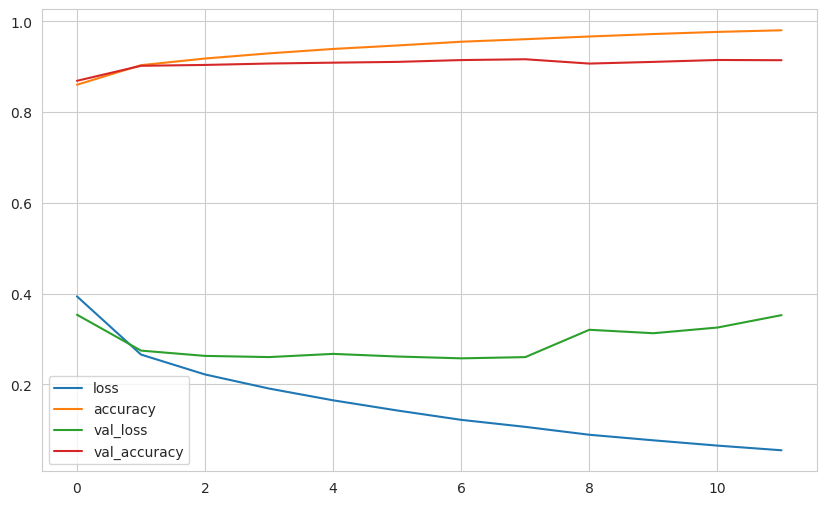

In [52]:
summary.plot();

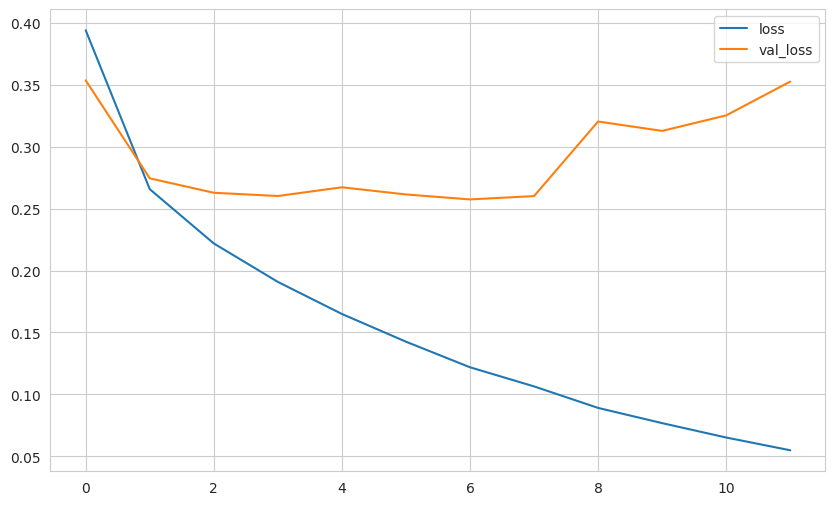

In [53]:
summary[["loss", "val_loss"]].plot();

# grafikleri böyle ayrı ayrı çizdirmekte fayda var ! :

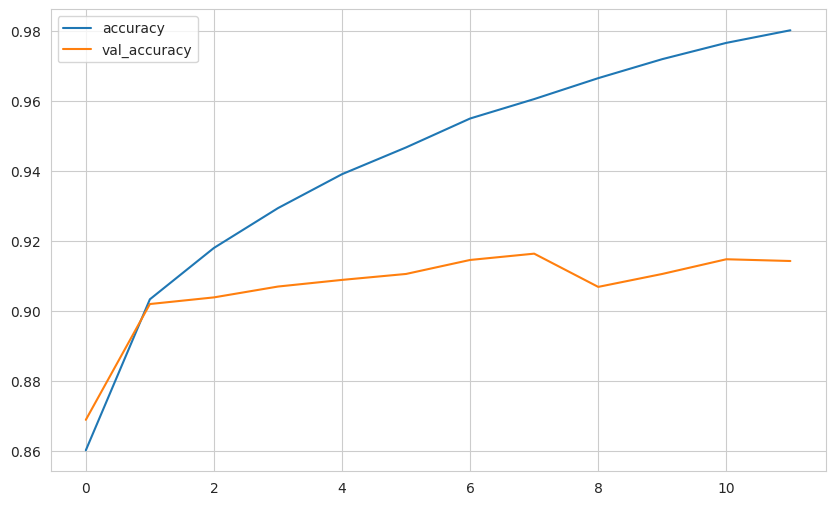

In [54]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [55]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [56]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2601 - accuracy: 0.9164


[0.2601395547389984, 0.9164000153541565]

In [57]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2601395547389984
Test accuracy: 0.9164000153541565


In [58]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[0.00000121, 0.00000005, 0.00000165, ..., 0.0007859 , 0.00000031,
        0.99918205],
       [0.00000687, 0.        , 0.9993981 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00000002, 0.        , 0.00000035, ..., 0.00000001, 0.9999746 ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00008021, 0.00000005, 0.00002184, ..., 0.00941673, 0.00003347,
        0.00001081]], dtype=float32)

In [59]:
pred_prob.shape

(10000, 10)

In [60]:
pred_prob[0]

# ilk data için döndürdüğü olasılıklar : 

array([0.00000121, 0.00000005, 0.00000165, 0.        , 0.00000025,
       0.00002834, 0.00000023, 0.0007859 , 0.00000031, 0.99918205],
      dtype=float32)

In [61]:
np.argmax(pred_prob[0])

# np.argmax ------> bu vektördeki max değerin indexini almak için kullanıyoruz .

9

In [62]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

# pred_probların tamamına argmaxla class'larını alıyoruz ki classifaciton reporta bakalım :

array([9, 2, 1, ..., 8, 1, 5])

In [63]:
y_pred.shape

(10000,)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.82      0.90      0.86      1000
           3       0.94      0.90      0.92      1000
           4       0.87      0.85      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.76      0.80      0.78      1000
           7       0.96      0.97      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [65]:
print(confusion_matrix(y_test, y_pred))

[[842   0  23   9   4   3 115   0   4   0]
 [  3 985   0   5   4   0   2   0   1   0]
 [ 11   0 898   6  35   0  50   0   0   0]
 [ 19   2  19 897  34   0  28   0   1   0]
 [  0   1  83  13 852   0  50   0   1   0]
 [  0   0   0   0   0 993   0   4   0   3]
 [ 61   0  71  14  51   0 796   0   7   0]
 [  0   0   0   0   0  15   0 974   0  11]
 [  3   0   2   8   1   1   7   1 977   0]
 [  1   0   0   0   0  11   0  38   0 950]]


<Axes: >

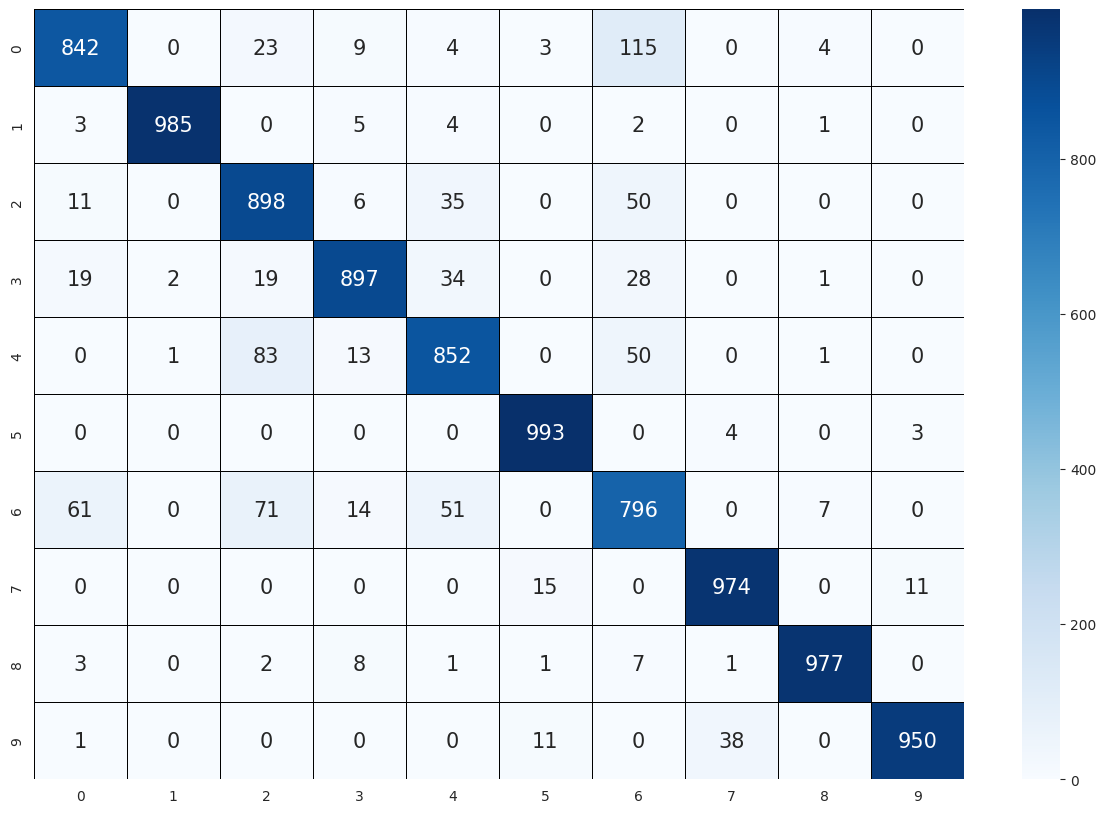

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [67]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

# y_test, y_pred'i karşılaştırıp aynı olmayanları almak için np.not_equal'i kullanıyoruz.

array([False, False, False, ..., False, False, False])

In [68]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

# np.not_equal(y_test, y_pred).sum() ile True'ları toplayıp döndürüyor (toplam hatalı değer)

836

In [69]:
np.equal(y_test, y_pred).sum()

## toplam doğru tahmin sayısı.

9164

## Prediction

In [70]:
my_fashion = X_test[3]

In [71]:
my_fashion.shape

(28, 28, 1)

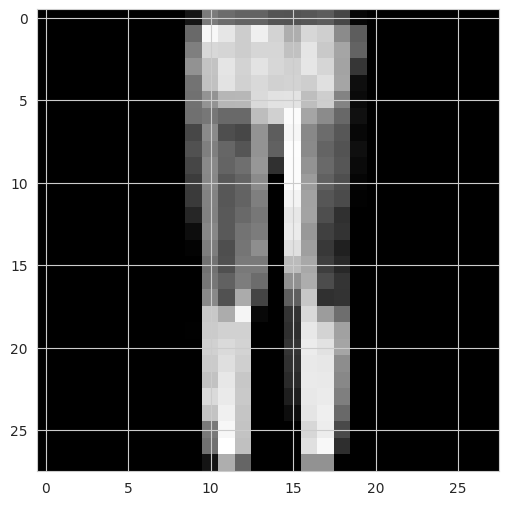

In [72]:
plt.imshow(my_fashion, cmap="gray")
plt.show()

In [73]:
# prediction alacağımız zaman nasıl eğittiysek modeli o şekilde vereceğiz biz nasıl eğittik batch_size'lar halinde eğittik
# ondan dolayı burada da boyutlu hale getirmeliyiz ; ml'de de mesela df şeklinde eğitim yaptığımızdan prediction alacağımız 
# zaman da ona uygun hale getiriyorduk.

In [74]:
pred_prob = model.predict(my_fashion.reshape(1,28,28,1)) # tek bir resim olduğunu söylüyoruz.
pred_prob

1/1 [==============================] - 0s 43ms/step


array([[0.        , 1.        , 0.        , 0.00000001, 0.00000001,
        0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

In [75]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

1

In [76]:
model.save("cnn-1.h5")

In [77]:
model=tf.keras.models.load_model('cnn-1.h5')

In [78]:
X_test[24].shape

(28, 28, 1)

In [79]:
pred=model.predict(np.expand_dims(X_test[24],axis=0))

# X_test[24].reshape(1,28,28,1)

1/1 [==============================] - 0s 61ms/step


In [80]:
np.argmax(pred)

1

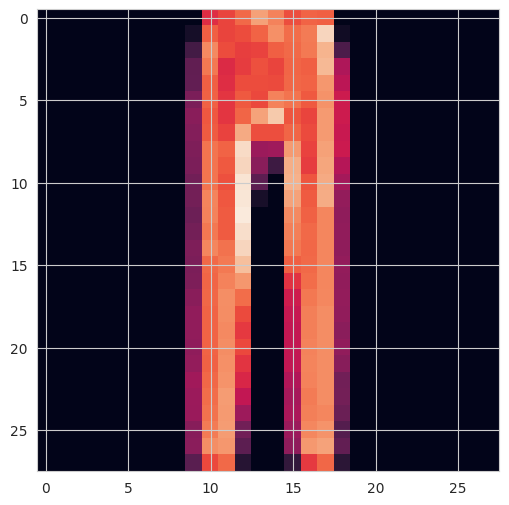

In [81]:
plt.imshow(X_test[24].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___